In [2]:
from class_separated_fp_explotimin import *


from scipy import integrate
import pandas as pd
from scipy.stats import pearsonr
import os
import glob

from itertools import product 

In [3]:
save_forcedphot  = '/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/forced_photometry/sample422/lc/'

In [4]:
def generate_LC(candiname, filt, peak):
    '''
    This function generates only the rise until the peak which is artificially added

    parameters
    ----------
    candiname [string] 
    filt      [string]
    peak      [table]

    '''

    la_force_ohoto = save_forcedphot  +  f'{candiname}_fp.ascii' 


    _filt = f'ZTF_{filt}'

    band         = ForcedPhot(la_force_ohoto, _filt , candiname )

    if len(band.table)>0:
        
        band.correct_lc(correct_unc = True, correct_z = True, correct_ext = True, add_jd_f_texp= True)
        band.add_magnitudes_detvndet_meas()
        band.table   = band.table[(band.table['mag'] <= 21.)|(band.table['mag'] >= 99.)] 
        # band.plot_maglc()

        photable = band.table['tfromexplo_zc','extcorrforcediffimflux','extcorrforcediffimfluxunc','mag','emag','absmag','e_absmag']
        
        if len(peak)>0:
            photable.add_row([peak['pday'], peak['pflux'], 1e-18 ,peak['papmag'],0.05 ,peak['pabmag'], peak['e_pabmag']])
            photable.sort('tfromexplo_zc')

        detec    = photable[photable['mag']!=99.0]
        detec    = detec[(detec['tfromexplo_zc']>=0)&(detec['tfromexplo_zc']<=peak['pday'])]

        return detec
    else : 
        print(f'No Data in {filt} band')
        return None

In [5]:
peaks_andall  = ascii.read('/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/peak_mag/peak_mag_fulinfantsample_01022022.ascii', delimiter=',')

In [6]:
table_infants = ascii.read('/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/tables/StandardSneII_01062023.csv', delimiter = ',')

In [7]:
standard_SNII = table_infants[(table_infants['rach-classification']=='SN II')|(table_infants['rach-classification']=='SN IIP')]

In [8]:
tabdeltamag = Table(names=('name', 'filter', 'Delta_mag', 'e_Delta_mag'), dtype = ('S20', 'S20','f8', 'f8'))

for candiname in standard_SNII['name']:
    peak_r = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]
    peak_g = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]

    if len(peak_r)>0 and len(peak_g)>0 :
        detec_r  = generate_LC(candiname, 'r', peak_r)
#         print(detec_r)
        delta_mag_r   = detec_r['mag'][-1] - detec_r['mag'][0]
        e_delta_mag_r = np.sqrt(detec_r['emag'][-1]**2 + detec_r['emag'][0]**2)

        tabdeltamag.add_row([candiname,'r',delta_mag_r,e_delta_mag_r])

        detec_g  = generate_LC(candiname, 'g', peak_g)
#         print(detec_g)
        delta_mag_g   = detec_g['mag'][-1] - detec_g['mag'][0]
        e_delta_mag_g = np.sqrt(detec_g['emag'][-1]**2 + detec_g['emag'][0]**2)

        tabdeltamag.add_row([candiname,'g',delta_mag_g,e_delta_mag_g])
    
    

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

In [9]:
tabdeltamag

name,filter,Delta_mag,e_Delta_mag
bytes20,bytes20,float64,float64
ZTF18aaaibml,r,-0.6580674573553011,0.08490009696843644
ZTF18aaaibml,g,-0.03740331093442961,0.0663592481741137
ZTF18aadsuxd,r,-2.352687743675439,0.09193293861075456
ZTF18aadsuxd,g,-1.9925143596081547,0.07391760597583891
ZTF18aapifti,r,-0.6345859930551718,0.12972452603782564
ZTF18aapifti,g,-0.17304306911939804,0.09379145020655956
ZTF18aaqkoyr,r,-1.2851705794497867,0.06810812060168236
ZTF18aaqkoyr,g,-0.6421595282206525,0.058743521578728905
ZTF18aarpttw,r,-1.4893448193399976,0.1580582289026408


In [10]:
tabdeltamag_r = tabdeltamag[tabdeltamag['filter']=='r']
tabdeltamag_g = tabdeltamag[tabdeltamag['filter']=='g']

Text(0, 0.5, '$m_{peak}-m_{discovery}$, g band')

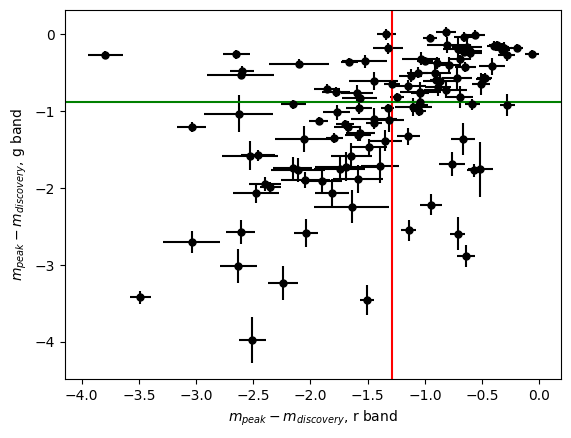

In [11]:
plt.figure()
plt.errorbar(tabdeltamag_r['Delta_mag'],tabdeltamag_g['Delta_mag'],tabdeltamag_g['e_Delta_mag'],tabdeltamag_r['e_Delta_mag'],
            fmt = 'o', ms=5 , color = 'black')
plt.axvline(np.median(tabdeltamag_r['Delta_mag']), color = 'red', label = 'Median $\Delta m_r$')
plt.axhline(np.median(tabdeltamag_g['Delta_mag']), color = 'green', label = 'Median $\Delta m_g$')

plt.xlabel('$m_{peak}-m_{discovery}$, r band')
plt.ylabel('$m_{peak}-m_{discovery}$, g band')

In [12]:
np.median(tabdeltamag_r['Delta_mag'])

-1.2851705794497867

In [17]:
np.percentile(tabdeltamag_r['Delta_mag'],30)

-1.6813131226275424

In [13]:
min(tabdeltamag_r['Delta_mag'])

-3.7922261039524443

In [14]:
max(tabdeltamag_r['Delta_mag'])

-0.06399411008996125

In [15]:
np.median(tabdeltamag_g['Delta_mag'])

-0.8756195143936587

## Color at first detection

In [18]:
tabdeltamag = Table(names=('name', 'g-r_atfd', 'e_g-r'), dtype = ('S20','f8', 'f8'))

for candiname in standard_SNII['name']:
    peak_r = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]
    peak_g = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]

    if len(peak_r)>0 and len(peak_g)>0 :
        detec_r  = generate_LC(candiname, 'r', peak_r)
        detec_g  = generate_LC(candiname, 'g', peak_g)
        
        if math.floor(detec_r['tfromexplo_zc'][0])==math.floor(detec_g['tfromexplo_zc'][0]):
            
            g_r   = detec_g['mag'][0] - detec_r['mag'][0]
            e_g_r = np.sqrt(detec_g['emag'][0]**2 + detec_r['emag'][0]**2)

            tabdeltamag.add_row([candiname,g_r,e_g_r])



/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

In [19]:
tabdeltamag

name,g-r_atfd,e_g-r
bytes20,float64,float64
ZTF18aadsuxd,-0.5006832275223871,0.09442180719943959
ZTF18aapifti,-0.19661421288346403,0.14361507158925918
ZTF18aaqkoyr,-0.6418401772913391,0.05558342756041496
ZTF18aarpttw,-0.021783517385159712,0.17396221027176348
ZTF18aaxwrjt,-0.1597862880320875,0.20547895797642632
ZTF18aayxxew,-0.022849005057505423,0.14178307863626058
ZTF18abckutn,-0.18780806322771681,0.15266790690010557
ZTF18abcptmt,1.2218719696440914,0.15090449255162933
ZTF18abdbysy,-0.6065918116036038,0.37813979869123027


In [20]:
np.median(tabdeltamag['g-r_atfd'])

-0.27181616833961186

In [21]:
np.median(tabdeltamag['e_g-r'])

0.14395472454855066